In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [2]:
gz2_loc = '/data/galaxy_zoo/gz2/catalogs/gz2_hart16.csv'
df = pd.read_csv(gz2_loc)

In [3]:
df.head()

,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


In [11]:
df.columns.values

array(['dr7objid', 'ra', 'dec', 'rastring', 'decstring', 'sample',
       'gz2_class', 'total_classifications', 'total_votes',
       't01_smooth_or_features_a01_smooth_count',
       't01_smooth_or_features_a01_smooth_weight',
       't01_smooth_or_features_a01_smooth_fraction',
       't01_smooth_or_features_a01_smooth_weighted_fraction',
       't01_smooth_or_features_a01_smooth_debiased',
       't01_smooth_or_features_a01_smooth_flag',
       't01_smooth_or_features_a02_features_or_disk_count',
       't01_smooth_or_features_a02_features_or_disk_weight',
       't01_smooth_or_features_a02_features_or_disk_fraction',
       't01_smooth_or_features_a02_features_or_disk_weighted_fraction',
       't01_smooth_or_features_a02_features_or_disk_debiased',
       't01_smooth_or_features_a02_features_or_disk_flag',
       't01_smooth_or_features_a03_star_or_artifact_count',
       't01_smooth_or_features_a03_star_or_artifact_weight',
       't01_smooth_or_features_a03_star_or_artifact_frac

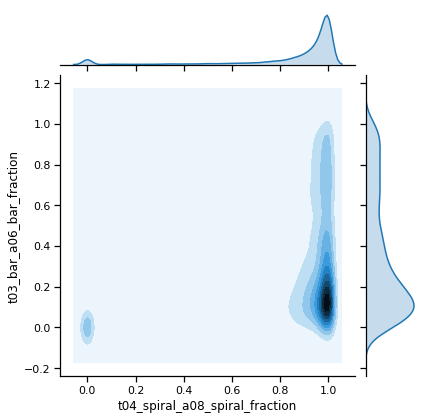

In [17]:
sns.jointplot(
    data=df.query('t01_smooth_or_features_a02_features_or_disk_fraction > 0.8').sample(5000),
    y='t03_bar_a06_bar_fraction',
    x='t04_spiral_a08_spiral_fraction', kind='kde'
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128267ef0>]],
      dtype=object)

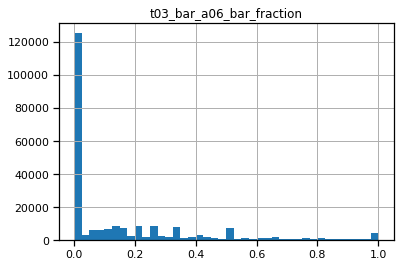

In [10]:
df.hist('t03_bar_a06_bar_fraction', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132b7ea90>]],
      dtype=object)

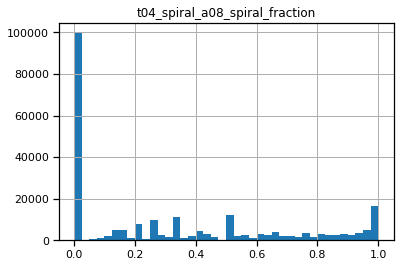

In [14]:
df.hist('t04_spiral_a08_spiral_fraction', bins=40)

In [21]:
df_full = df.copy()

In [52]:
def show_scatter(df, extra=None, extra_df=None):
    
    plt.figure(figsize=(8, 8))
    bar_fraction = df['t03_bar_a06_bar_fraction']
    spiral_fraction = df['t04_spiral_a08_spiral_fraction']

    plt.scatter(spiral_fraction, bar_fraction, s=1)
    if extra:
        plt.scatter(extra[0], extra[1], s=0.2, color='r')
    if extra_df is not None:
        bar_fraction = extra_df['t03_bar_a06_bar_fraction']
        spiral_fraction = extra_df['t04_spiral_a08_spiral_fraction']
        plt.scatter(bar_fraction, spiral_fraction, s=0.2, color='r')
    plt.ylabel('Bar Fraction')
    plt.xlabel('Spiral Fraction')


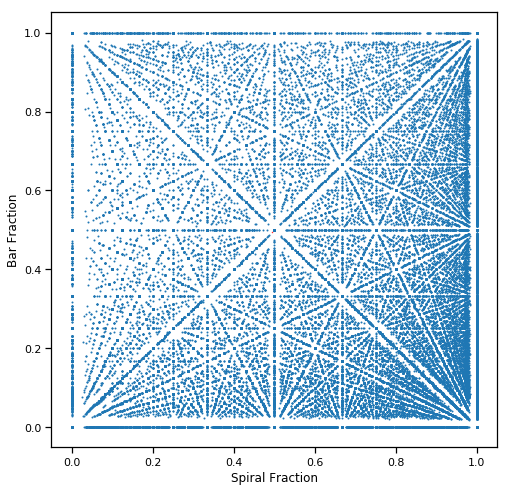

In [37]:
show_scatter(df, extra=(0.495, 0.495))

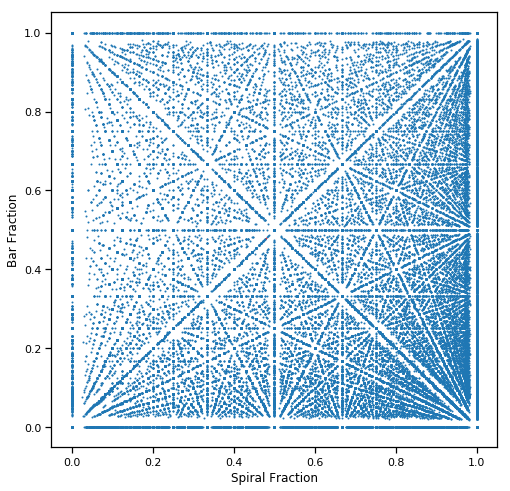

In [41]:
show_scatter(df, extra=(0.48, 0.48))

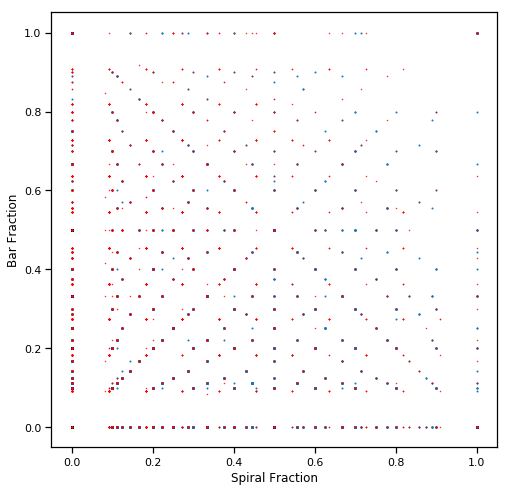

In [53]:
show_scatter(df.query('t01_smooth_or_features_a02_features_or_disk_count == 10'), extra_df=df.query('t01_smooth_or_features_a02_features_or_disk_count == 11'))

In [39]:
0.495 * 50

24.75

In [40]:
24 / 50

0.48

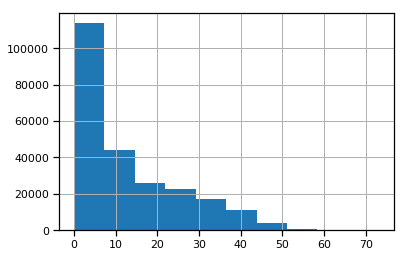

In [38]:
df['t01_smooth_or_features_a02_features_or_disk_count'].hist()

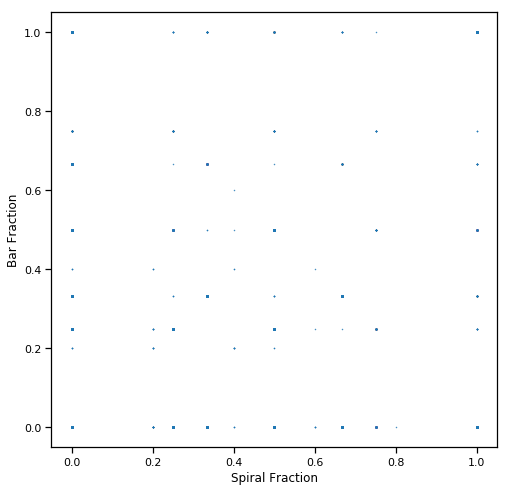

In [27]:
show_scatter(df.query('t01_smooth_or_features_a02_features_or_disk_count < 5'))

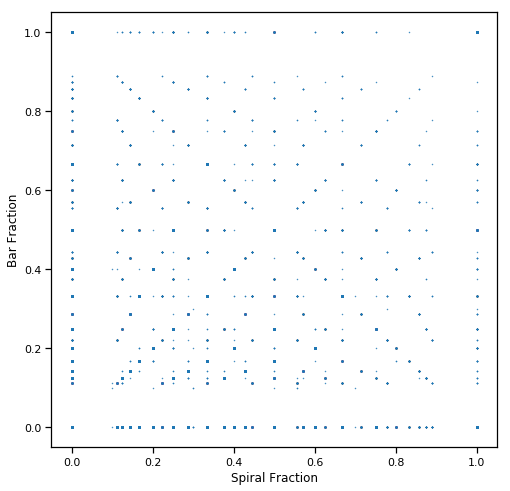

In [28]:
show_scatter(df.query('t01_smooth_or_features_a02_features_or_disk_count < 10'))

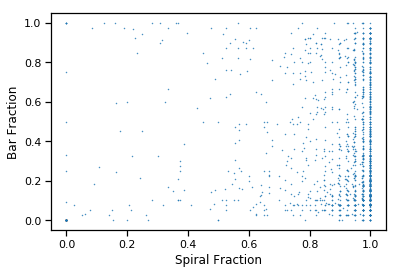

In [24]:
show_scatter(df.query('t01_smooth_or_features_a02_features_or_disk_count == 40'))

In [ ]:
show_scatter(df.query('t01_smooth_or_features_a02_features_or_disk_count == 40'))